# Homework Assignment 3: Text Analytics

## André Schweizer

### Import libraries

In [1030]:
import os
import numpy as np
import pandas as pd
import glob
import nltk
import re
from nltk.tokenize import word_tokenize,sent_tokenize,RegexpTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords
from itertools import compress

### Import files

In [1414]:
# Open training labeled data
ceo = pd.read_csv('ceo.csv', header = None, names = ['FirstName','LastName'])
companies = pd.read_csv('companies.csv', header = None, names =['Name'])
percentage = pd.read_csv('percentage.csv', header = None, names = ['Percentage'])

In [32]:
# Create list of paths to files in corpus
docpaths = glob.glob('/Users/andreschweizer/Documents/2019W/IEMS 308/Text Analytics/Corpus/' + '[!~]*.txt')

In [144]:
# Get texts out of corpus into one list of strings with preliminary sentence segmentation.
# Each item is a sentence in the corpus separated by .,!, or ?
text = []

for element in docpaths:
    with open(element, 'r')as f:
        text = text + re.split(r'[.?!]',f.read())

### Clean data

In [ ]:
# Remove stop words
count = -1
for sent in text:
    count = count + 1
    tokenized_sent = word_tokenize(sent)
    filtered_words = [word for word in tokenized_sent if word not in stopwords.words("english")]
    filtered_sent = ' '.join(filtered_words)
    text[count] = filtered_sent

In [1103]:
# Format test data
ceo.FirstName = ceo.FirstName.fillna(' ')
ceo.LastName = ceo.LastName.fillna(' ')
ceo['Name'] = ceo.FirstName + ' ' + ceo.LastName
ceo = ceo.drop(['FirstName', 'LastName'], axis=1)
ceo.head()

,Name
0,Tom Horton
1,Patti Hart
2,Jamie Dimon
3,Steve Cohen
4,Tim Cook


## Find COMPANY NAMES

In [ ]:
# Find sentences with proper nouns
sentswithPN = []
count = -1

for sent in text:
    count = count + 1
    foundname = False
    sent_tokens = word_tokenize(sent)
    sent_tagged = pos_tag(sent_tokens)
    for word in sent_tagged:
        if word[1] == ('NNP' or 'NNPS'):
            sentswithPN.insert(count,True)
            foundname = True
            break
    if foundname == False:
        sentswithPN.insert(count,False)

In [320]:
# Only keep sentences with proper nouns
textPN = list(compress(text,sentswithPN))

In [506]:
print('Number of total sentences in corpus :{}'.format(len(text)))
print('Number of sentences with propernounts :{}'.format(len(textPN)))

Number of total sentences in corpus :882980
Number of sentences with propernounts :493318


In [710]:
# Create list of features

features_companies = ['LLC','Co','Ltd','Company','Corporation','Enterprise','Limited','Inc','Corp','Incorporated',
                      'International', 'Intl','Venture','Group','Association','Brand','Technologies','Management',
                      'Number of Capital Letters']

In [839]:
# Create regular expressions for features in actual names
re_llc = r'([A-Z].+?\s?)(?:\W\s?[Ll]\.?[Ll]\.?[Cc])'
re_co = r'([A-Z].+?\s?)(?:\W\s?[C][Oo])'
re_ltd = r'([A-Z].+?\s?)(?:\W\s?[Ll]\.?[Tt]\.?[Dd])'
re_company = r'([A-Z].+?\s?)(?:\W\s?[C][Oo][Mm][Pp][Aa][Nn][Yy])'
re_corporation = r'([A-Z].+?\s?)(?:\W\s?[C][Oo][Rr][Pp][Oo][Rr][Aa][Tt][Ii][Oo][Nn])'
re_enterprise = r'([A-Z].+?\s?)(?:\W\s?[E][Nn][Tt][Ee][Rr][Pp][Rr][Ii][Ss][Ee])'
re_limited = r'([A-Z].+?\s?)(?:\W\s?[L][Ii][Mm][Ii][Tt][Ee][Dd])'
re_inc = r'([A-Z].+?\s?)(?:\W\s?[I][Nn][Cc])'
re_corp = r'([A-Z].+?\s?)(?:\W\s?[C][Oo][Rr][Pp])'
re_incorporated = r'([A-Z].+?\s?)(?:\W\s?[I][Nn][Cc][Oo][Rr][Pp][Oo][Rr][Aa][Tt][Ee][Dd])'
re_international = r'([A-Z].+?\s?)(?:\W\s?[I][Nn][Tt][Ee][Rr][Nn][Aa][Tt][Ii][Oo][Nn][Aa][Ll])'
re_intl = r'([A-Z].+?\s?)(?:\W\s?[I][Nn][Tt][Ll])'
re_venture = r'([A-Z].+?\s?)(?:\W\s?[V][Ee][Nn][Tt][Uu][Rr][Ee])'
re_group = r'([A-Z].+?\s?)(?:\W\s?[G][Rr][Oo][Uu][Pp])'
re_association = r'([A-Z].+?\s?)(?:\W\s?[A][Ss][Ss][Oo][Cc][Ii][Aa][Tt][Ii][Oo][Nn])'
re_brand = r'([A-Z].+?\s?)(?:\W\s?[B][Rr][Aa][Nn][Dd])'
re_tech = r'([A-Z].+?\s?)(?:\W\s?[T][Ee][Cc][Hh][Nn][Oo][Ll][Oo][Gg])'
re_mgmt = r'([A-Z].+?\s?)(?:\W\s?[M][Aa][Nn][Aa][Gg][Ee][Mm][Ee][Nn][Tt])'

compnamefeatures = pd.Series([re_llc, re_co, re_ltd, re_company, re_corporation,re_enterprise,re_limited,re_inc,
                             re_corp, re_incorporated, re_international, re_intl, re_venture, re_group,
                             re_association, re_brand, re_tech, re_mgmt])

In [1104]:
companiestrain = companies[0:3082].append(ceo[0:1992]) # 75% as training data
companiestest = companies[3082:len(companies)+1].append(ceo[1992:len(ceo)+1])

In [1105]:
# Create frame with features for training data
companyframetrain = pd.DataFrame(index = range(0,len(companiestrain)), columns = features_companies) 
companyframetrain = companyframetrain.fillna(0)
companyframetrain.head()

,LLC,Co,Ltd,Company,Corporation,Enterprise,Limited,Inc,Corp,Incorporated,International,Intl,Venture,Group,Association,Brand,Technologies,Management,Number of Capital Letters
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1119]:
# Create frame with features for test data
companyframetest = pd.DataFrame(index = range(0,len(companiestest)), columns = features_companies) 
companyframetest = companyframetest.fillna(0)
companyframetest.head()

,LLC,Co,Ltd,Company,Corporation,Enterprise,Limited,Inc,Corp,Incorporated,International,Intl,Venture,Group,Association,Brand,Technologies,Management,Number of Capital Letters
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1107]:
# Populate table with proper information about training data
companycount = -1

for comp in companiestrain.Name:
    companycount = companycount + 1
    featurecount = -1
    for feature in list(companyframetrain):
        featurecount = featurecount + 1
        if feature == 'Number of Capital Letters':
            companyframetrain[feature][companycount] = sum(1 for c in comp if c.isupper())
        else:
            if re.search(compnamefeatures[featurecount], comp) != None:
                companyframetrain[feature][companycount] = 1

companyframetrain.head()

,LLC,Co,Ltd,Company,Corporation,Enterprise,Limited,Inc,Corp,Incorporated,International,Intl,Venture,Group,Association,Brand,Technologies,Management,Number of Capital Letters
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [1120]:
# Populate table with proper information about test data
companycount = -1

for comp in companiestest.Name:
    companycount = companycount + 1
    featurecount = -1
    for feature in list(companyframetest):
        featurecount = featurecount + 1
        if feature == 'Number of Capital Letters':
            companyframetest[feature][companycount] = sum(1 for c in comp if c.isupper())
        else:
            if re.search(compnamefeatures[featurecount], comp) != None:
                companyframetest[feature][companycount] = 1

companyframetest.head()

,LLC,Co,Ltd,Company,Corporation,Enterprise,Limited,Inc,Corp,Incorporated,International,Intl,Venture,Group,Association,Brand,Technologies,Management,Number of Capital Letters
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,3
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2


In [1179]:
# Import and create estimator
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1116]:
# Create column in companyframetrain to indicate whether names are companies
companyframetrain['Classifier'] = 0
companyframetrain['Classifier'][0:3082] = 1
companyframetrain.head()

,LLC,Co,Ltd,Company,Corporation,Enterprise,Limited,Inc,Corp,Incorporated,International,Intl,Venture,Group,Association,Brand,Technologies,Management,Number of Capital Letters,Classifier
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,1
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1


In [1552]:
# Train the model
X = companyframetrain.drop('Classifier', axis = 1)
y = companyframetrain['Classifier']
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Get list of proper nouns in text
PN = []
count = -1

for sent in textPN:
    sentence = sentence + 1
    sent_tokens = word_tokenize(sent)
    sent_tagged = pos_tag(sent_tokens)
    for word in sent_tagged:
        if word[1] == ('NNP' or 'NNPS'):
            count = count + 1
            PN.insert(count, word[0])

In [1005]:
# Number of proper nouns in corpus
len(PN)

1541553

In [ ]:
# Find possible company names in corpus that weren't caught as PNs
companycount = -1
possiblecompanies = []
sentcount = -1

for sent in textPN:
    sentcount = sentcount+1
    for regex in compnamefeatures:
        match = re.search(regex, sent)
        if match != None:
            companycount = companycount + 1
            possiblecompanies.insert(companycount, match.group())

In [854]:
# Append list of proper nouns and other possible company names
possiblecomp = PN+possiblecompanies

In [855]:
# Create frame for proper nouns in corpus
comptest = pd.DataFrame(index = range(0,len(possiblecomp)), columns = features_companies)
comptest = comptest.fillna(0)
comptest.shape

(1647193, 19)

In [ ]:
# Fill in frame with appropriate information for corpus data

companycount = -1

for comp in possiblecomp:
    companycount = companycount + 1
    featurecount = -1
    for feature in list(comptest):
        featurecount = featurecount + 1
        if feature == 'Number of Capital Letters':
            comptest[feature][companycount] = sum(1 for c in comp if c.isupper())
        else:
            if re.search(compnamefeatures[featurecount], comp) != None:
                comptest[feature][companycount] = 1

In [1554]:
# Make predictions for test data
y_predtest = logreg.predict(companyframetest.drop(['Classifier'], axis = 1))

In [1191]:
# Evaluate accuracy
# First 1029 elements in test data were actually companies
truepositive = 100*sum(y_predtest[0:1029])/1029
falsepositive = 100*sum(y_predtest[1029:len(y_predtest)+1])/(len(y_predtest)-1029)
print("True positive rate: {:.2f}%".format(truepositive))
print("False positive rate: {:.2f}%".format(falsepositive))

True positive rate: 57.00%
False positive rate: 2.00%


In [1127]:
# Create column in companyframetest to indicate whether it's really a company or a negative sample
companyframetest['Classifier'] = 0
companyframetest['Classifier'][0:1029] = 1

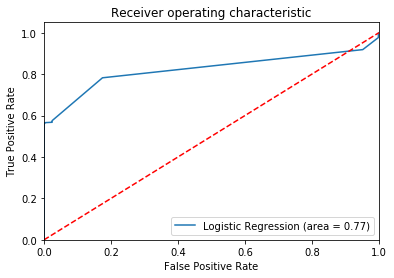

In [1181]:
# ROC plot, code adapted from: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(companyframetest['Classifier'], y_predtest)
fpr, tpr, thresholds = roc_curve(companyframetest['Classifier'], logreg.predict_proba(companyframetest.drop(['Classifier'], axis =1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1182]:
# Make predictions
y_pred = logreg.predict(comptest)

In [1183]:
# Keep only items that are are predicted to be company names
compnames = []
for i in range(len(possiblecomp)):
      if y_pred[i] == 1:
             compnames.append(possiblecomp[i])

In [1184]:
len(compnames)

525

In [1185]:
compnamesrepeated = pd.Series(compnames)
compnames = pd.DataFrame(compnamesrepeated.unique(), columns = ['CompanyNames'])
compnames.head()

,CompanyNames
0,Coca-Cola
1,Dell—Cohen
2,All-Country
3,Book’s International
4,Manufacturing�Construction


In [1186]:
compnames.shape

(230, 1)

In [1044]:
# Export to CSV
compnames.to_csv("Preliminary Company Names3.csv")

## Find CEO NAMES

In [970]:
# Define features for CEOs
features_ceos = ['Number of Capital Letters', 'Number of Words', 'Avg Length of Word',]

In [ ]:
# Find sentences with company names or "CEO" in them
possentswithceo = []
sentcount = -1

for sent in textPN:
    foundceo = False
    sentcount = sentcount + 1
    for comp in compnames:
        if comp in sent:
            possentswithceo.insert(sentcount, True)
            foundceo = True
            break
        if "CEO" in sent:
            possentswithceo.insert(sentcount, True)
            foundceo = True
            break
    if foundceo == False:
        possentswithceo.insert(sentcount,False)

In [877]:
ceosents = []

for i in range(len(textPN)):
      if possentswithceo[i] == True:
             ceosents.append(textPN[i])

In [885]:
# Find bigrams with words starting with capital letters
re_ceonames = r'([A-Z][a-z]+?\s[A-Z][a-z]+?\s)'

In [889]:
possibleceonames = []
ceocount = -1

for sent in ceosents:
    match = re.search(re_ceonames, sent)
    if match != None:
        ceocount = ceocount + 1
        possibleceonames.insert(ceocount,match.group())

In [1137]:
# Separate training and test data
ceotrain = ceo[0:1992].append(companies[0:3082]) # 75% of data as training
ceotest = ceo[1992:len(ceo)+1].append(companies[3082:len(companies)+1])

In [1140]:
# Create feature frame for training data
ceoframetrain = pd.DataFrame(index = range(0,len(ceotrain)), columns = features_ceos) 
ceoframetrain = ceoframetrain.fillna(0)
ceoframetrain['Classifier'] = 0
ceoframetrain['Classifier'][0:1992] = 1
ceoframetrain.head()

,Number of Capital Letters,Number of Words,Avg Length of Word,Classifier
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [1144]:
# Create feature frame for test data
ceoframetest = pd.DataFrame(index = range(0,len(ceotest)), columns = features_ceos) 
ceoframetest = ceoframetest.fillna(0)
ceoframetest['Classifier'] = 0
ceoframetest['Classifier'][0:665] = 1
ceoframetest.head()

,Number of Capital Letters,Number of Words,Avg Length of Word,Classifier
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [972]:
# Create feature frame for corpus data
ceoframecorpus = pd.DataFrame(index = range(0,len(possibleceonames)), columns = features_ceos)
ceoframecorpus = ceoframecorpus.fillna(0)
ceoframecorpus.head()

,Number of Capital Letters,Number of Words,Avg Length of Word
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [1145]:
# Populate frame for training data

countname = -1

for name in ceotrain.Name:
    countname = countname + 1
    ceoframetrain['Number of Capital Letters'][countname] = sum(1 for c in name if c.isupper())
    ceoframetrain['Number of Words'][countname] = len(word_tokenize(name))
    ceoframetrain['Avg Length of Word'][countname] = (len(name)- ceoframetrain['Number of Words'][countname])/ceoframetrain['Number of Words'][countname]

ceoframetrain.head()

,Number of Capital Letters,Number of Words,Avg Length of Word,Classifier
0,2,2,4,1
1,2,2,4,1
2,2,2,4,1
3,2,2,4,1
4,2,2,3,1


In [1146]:
# Populate frame for test data

countname = -1

for name in ceotest.Name:
    countname = countname + 1
    ceoframetest['Number of Capital Letters'][countname] = sum(1 for c in name if c.isupper())
    ceoframetest['Number of Words'][countname] = len(word_tokenize(name))
    ceoframetest['Avg Length of Word'][countname] = (len(name)- ceoframetest['Number of Words'][countname])/ceoframetest['Number of Words'][countname]

ceoframetest.head()

,Number of Capital Letters,Number of Words,Avg Length of Word,Classifier
0,2,2,5,1
1,2,2,5,1
2,2,2,8,1
3,2,2,8,1
4,2,2,7,1


In [974]:
# Populate frame for corpus data

countname = -1

for name in possibleceonames:
    countname = countname + 1
    ceoframecorpus['Number of Capital Letters'][countname] = sum(1 for c in name if c.isupper())
    ceoframecorpus['Number of Words'][countname] = len(word_tokenize(name))
    ceoframecorpus['Avg Length of Word'][countname] = (len(name)- ceoframecorpus['Number of Words'][countname])/ceoframecorpus['Number of Words'][countname]

ceoframecorpus.head()

,Number of Capital Letters,Number of Words,Avg Length of Word
0,2,2,10
1,2,2,8
2,2,2,6
3,2,2,7
4,2,2,6


In [1535]:
# Train model
X = ceoframetrain.drop('Classifier', axis = 1)
y = ceoframetrain['Classifier']
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1536]:
# Make predictions for test data
y_predceotest = logreg.predict(ceoframetest.drop(['Classifier'], axis = 1))

In [1537]:
# Evaluate accuracy - first 665 elements in test data are actually CEOs
truepositive = 100*sum(y_predceotest[0:665])/665
falsenegative = 100*sum(y_predceotest[665:len(y_predceotest)+1])/(len(y_predceotest)-665)

print("True positive rate: {:.2f}%".format(truepositive))
print("False positive rate: {:.2f}%".format(falsepositive))

True positive rate: 99.00%
False positive rate: 2.00%


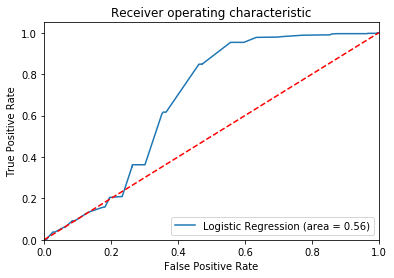

In [1538]:
# ROC plot, code adapted from: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
logit_roc_auc = roc_auc_score(ceoframetest['Classifier'], y_predceotest)
fpr, tpr, thresholds = roc_curve(ceoframetest['Classifier'], logreg.predict_proba(ceoframetest.drop(['Classifier'], axis =1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [1539]:
# Make predictions for corpus data
y_predceo = logreg.predict(ceoframecorpus)

In [1540]:
# Keep only items that are are predicted to be CEO names
ceonames = []
for i in range(len(possibleceonames)):
      if y_predceo[i] == 1:
             ceonames.append(possibleceonames[i])

In [1541]:
len(ceonames)

4279

In [1542]:
# Remove repeated names
ceonamesrepeated = pd.Series(ceonames)
ceonames = pd.DataFrame(ceonamesrepeated.unique(), columns = ['CEONames'])
ceonames.head()

,CEONames
0,Industrial Renaissance
1,Anand Nallathambi
2,Torino Capital
3,Jeffrey Gundlach
4,Carly Fiorina


In [1543]:
ceonames.shape

(2196, 1)

In [1544]:
# Export to CSV
ceonames.to_csv("Preliminary CEO Names.csv")

## Find PERCENTAGES

In [1463]:
# Define features for percentages
features_percent = ['Decimal point', 'Number of digits', 'Digits after decimal point','Digits before decimal point']

In [ ]:
# Find sentences with "percent" or "%" in them
possentswithpercentage = []
sentcount = -1

re_percent = r'[Pp][Ee][Rr][Cc][Ee][Nn][Tt]'

for sent in text:
    foundpercentage = False
    sentcount = sentcount + 1
    print sentcount
    match = re.search(re_percent,sent)
    if match != None:
        foundpercentage = True
        possentswithpercentage.insert(sentcount, sent)
        continue
    if "%" in sent:
        foundpercentage = True
        possentswithpercentage.insert(sentcount, sent)
        continue

In [1224]:
len(possentswithpercentage)

70366

In [1431]:
# Create negative percentage samples
import random

one = np.random.uniform(0,1,1000)
ten = np.random.uniform(1,10,1000)
hundred = np.random.uniform(10,100,1000)
thousand = np.random.uniform(100,1000,500)

numbers = np.concatenate([one, ten, hundred, thousand], axis = 0)

for i in range(0,500):
    numbers[i] = round(numbers[i],4)

for i in range(500,1000):
    numbers[i] = round(numbers[i],3)
    
for i in range(1000,1500):
    numbers[i] = round(numbers[i],2)

for i in range(1500,2000):
    numbers[i] = round(numbers[i],1)
    
for i in range(2000,2500):
    numbers[i] = round(numbers[i],0)

numbers = map(str, numbers)
random.shuffle(numbers)
numbers = pd.DataFrame(numbers, columns = ["Percentage"])

In [1432]:
# Divide label deta
percentagetrain = percentage[0:4032].append(numbers[0:1875]) # 75% of data as training
percentagetest = percentage[4032:len(percentage)].append(numbers[1875:len(numbers)])

In [1464]:
# Create feature frame for train data
percentageframetrain = pd.DataFrame(index = range(0,len(percentagetrain)), columns = features_percent) 
percentageframetrain = percentageframetrain.fillna(0)
percentageframetrain['Classifier'] = 0
percentageframetrain['Classifier'][0:4032] = 1
percentageframetrain.head()

,Decimal point,Number of digits,Digits after decimal point,Digits before decimal point,Classifier
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [1465]:
# Create feature frame for test data
percentageframetest = pd.DataFrame(index = range(0,len(percentagetest)), columns = features_percent) 
percentageframetest = percentageframetest.fillna(0)
percentageframetest['Classifier'] = 0
percentageframetest['Classifier'][0:len(percentage[4032:len(percentage)])] = 1
percentageframetest.head()

,Decimal point,Number of digits,Digits after decimal point,Digits before decimal point,Classifier
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [1444]:
# Find percentages in sentences
re_sign = r'([\.0-9]+?\s?\%)'
re_word = r'([\-A-Za-z_]+?)\s[Pp][Ee][Rr][Cc][Ee][Nn][Tt]'

In [ ]:
posspercentages = []
percentcount = -1
sentcount = -1

for sent in possentswithpercentage:
    sentcount = sentcount + 1
    print sentcount
    match1 = re.search(re_sign, sent)
    match2 = re.search(re_word, sent)
    if match1 != None:
        percentcount = percentcount + 1
        posspercentages.insert(percentcount, match1.group())
    if match2 != None:
        percentcount = percentcount + 1
        posspercentages.insert(percentcount, match2.group())

In [1529]:
# Create feature frame for corpus data
percentframecorpus = pd.DataFrame(index = range(0,len(posspercentages)), columns = features_percent)
percentframecorpus = percentframecorpus.fillna(0)

posspercentages = pd.DataFrame(posspercentages, columns = ['Percentage'])
percentframecorpus.head()

In [1523]:
# Populate feature frame for training data
countperc = -1

for perc in percentagetrain.Percentage:
    countperc = countperc + 1
    if (("." in perc) and (re.search(r'\.[0-9a-zA-Z]',perc) != None)):
        percentageframetrain['Decimal point'][countperc] = 1
        match = re.search(r'\.([0-9]+?)[\%\s\-$]', perc)
        if match != None:
            percentageframetrain['Digits after decimal point'][countperc] = len(match.group())-2
    if (("." in perc) and (re.search(r'([0-9\-]+?)\.',perc) != None)):
        percentageframetrain['Digits before decimal point'][countperc] = len(re.search(r'([0-9\-]+?)\.', perc).group())-1
    percentageframetrain['Number of digits'][countperc] = len(perc)
    
percentageframetrain.head()

,Decimal point,Number of digits,Digits after decimal point,Digits before decimal point,Classifier
0,0,3,2,1,1
1,0,3,2,1,1
2,0,3,2,1,1
3,0,3,2,1,1
4,0,4,2,1,1


In [1526]:
# Populate feature frame for test data
countperc = -1

for perc in percentagetest.Percentage:
    countperc = countperc + 1
    if (("." in perc) and (re.search(r'\.[0-9a-zA-Z]',perc) != None)):
        percentageframetest['Decimal point'][countperc] = 1
        match = re.search(r'\.([0-9]+?)[\%\s\-$]', perc)
        if match != None:
            percentageframetest['Digits after decimal point'][countperc] = len(match.group())-2
    if (("." in perc) and (re.search(r'([0-9\-]+?)\.',perc) != None)):
        percentageframetest['Digits before decimal point'][countperc] = len(re.search(r'([0-9\-]+?)\.', perc).group())-1
    percentageframetest['Number of digits'][countperc] = len(perc)
    
percentageframetest.head()

,Decimal point,Number of digits,Digits after decimal point,Digits before decimal point,Classifier
0,1,5,2,1,1
1,1,5,2,1,1
2,1,5,2,1,1
3,1,5,2,1,1
4,1,11,1,1,1


In [1531]:
# Populate feature frame for corpus data
countperc = -1 


for perc in posspercentages.Percentage:
    countperc = countperc + 1
    if (("." in perc) and (re.search(r'\.[0-9a-zA-Z]',perc) != None)):
        percentframecorpus['Decimal point'][countperc] = 1
        match = re.search(r'\.([0-9]+?)[\%\s\-$]', perc)
        if match != None:
            percentframecorpus['Digits after decimal point'][countperc] = len(match.group())-2
    if (("." in perc) and (re.search(r'([0-9\-]+?)\.',perc) != None)):
        percentframecorpus['Digits before decimal point'][countperc] = len(re.search(r'([0-9\-]+?)\.', perc).group())-1
    percentframecorpus['Number of digits'][countperc] = len(perc)
    
percentframecorpus.head()

,Decimal point,Number of digits,Digits after decimal point,Digits before decimal point
0,0,3,0,0
1,0,4,0,0
2,0,3,0,0
3,0,4,0,0
4,0,4,0,0


In [1556]:
# Train model
X = percentageframetrain.drop('Classifier', axis = 1)
y = percentageframetrain['Classifier']
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [1557]:
# Make predictions for test data
y_predtestpercentages = logreg.predict(percentageframetest.drop(['Classifier'], axis = 1))

In [1587]:
# Evaluate accuracy
truepositive = 100*sum(y_predtestpercentages[0:len(percentage[4032:len(percentage)])])/len(percentage[4032:len(percentage)])
falsepositive = 100*sum(y_predtestpercentages[len(percentage[4032:len(percentage)]):len(y_predtestpercentages)+1])/len(numbers[1875:len(numbers)])

print("True positive rate: {:.2f}%".format(truepositive))
print("False positive rate: {:.2f}%".format(falsepositive))                                                                                                           
                                                                                                                

True positive rate: 88.00%
False positive rate: 100.00%


In [1593]:
# Make predictions for corpus data
y_predpercentages = logreg.predict(percentframecorpus)
sum(y_predpercentages)

49687

In [1602]:
# Keep only items that are are predicted to be percentages
percentages = []
for i in range(len(posspercentages)):
      if y_predpercentages[i] == 1:
             percentages.append(posspercentages.Percentage[i])

In [1607]:
# Export to CSV
percentages = pd.DataFrame(percentages, columns = ['Percentage'])
percentages.to_csv("Preliminary Percentages.csv")